In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [2]:
metadata_str = 'data/mgp93_metadata.csv'
data_str = 'data/mgp93_data_genus.tsv'

In [3]:
df_metadata = pd.read_csv(metadata_str)
df_data = pd.read_csv(data_str, sep='\t')

df_metadata = df_metadata.drop([0], axis=0) # first row is a description of each column
#df_metadata = df_metadata.loc[df_metadata['mislabeled'] == 'n'] # drop mislabeled data

### Manipulate data
Need this in order to the match metadata with the data.

In [4]:
## Do some meta_data manipulation

# Only keep useful metadata columns
metadata_useful = ['sample_name', 'collection_date', 'common_sample_site', 'host_individual', 'mislabeled']
df_metadata = df_metadata.loc[:, metadata_useful]
# Index on sample_name so we can combine the meta_data with the data
df_metadata = df_metadata.set_index('sample_name')

## Do some data manipulation

# Change file names to match those in meta_data
df_data.columns = [col_title.split('.', 1)[0] for col_title in df_data.columns]
# Drop unclassified genus
df_data = df_data.drop(index = (df_data[df_data['genus'].str.contains("unclassified")]).index)

In [5]:
# Make the metadata and the data dataframes match and...
df_data_1 = pd.concat([(df_data.T).iloc[0:6], (df_data.T).iloc[6:].sort_index()])
df_metadata_1 = pd.concat([pd.DataFrame(np.nan, index=df_data_1.iloc[0:6].index.values, columns=df_metadata.columns), df_metadata])
# ...concatanate them
df_data = pd.concat([df_metadata_1, df_data_1], axis=1, sort=False)

In [6]:
df_data.insert(0, 'sample_name', df_data.index.values) # to store once the index will be reset
# Set index to days (in float) since first sampling
df_data['collection_date'] = pd.to_datetime(df_data['collection_date'])
df_data.loc['L1S1':] = (df_data.loc['L1S1':].sort_values(by='collection_date')).values
t0 = df_data['collection_date'][6]
df_data['days'] = (df_data['collection_date']-t0).astype('timedelta64[D]')# Time difference in days (converted to floats)
df_data = df_data.set_index('days')

### Clean data

In [7]:
# Eliminate mislabeled data
df_data = df_data[(df_data.mislabeled == 'n')  | (df_data['mislabeled'].isnull())]

# Select data for a certain subject and sample location
df_data_F_gut = df_data[((df_data.host_individual == 'F4') | (df_data['host_individual'].isnull()))
                       & ((df_data.common_sample_site == 'feces') | (df_data['common_sample_site'].isnull()))]

### Plot

In [19]:
data_range = np.arange(6, 1000) # 6 is the first genus
y = df_data_F_gut.loc[1:, df_data_F_gut.columns[data_range]]
x = df_data_F_gut[1:].index.values
legend_list = df_data_F_gut.loc[df_data_F_gut['sample_name'] == 'genus'].loc[:, df_data_F_gut.columns[data_range]].values[0]

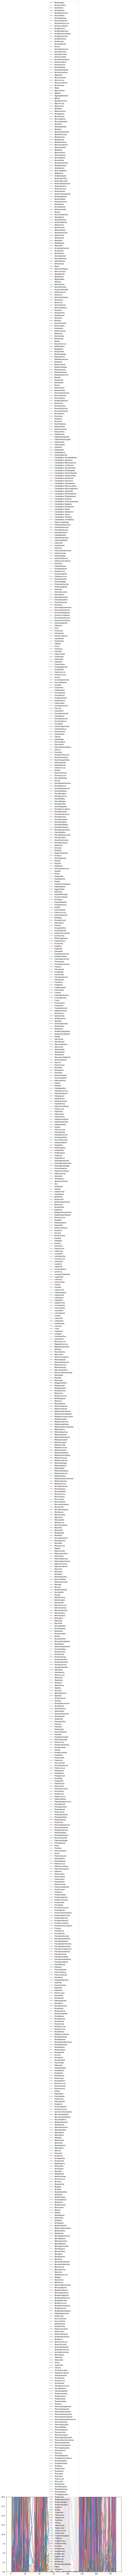

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#ax.set_yscale('log')
plt.plot(x, y)
plt.ylim([0,20])
plt.legend(legend_list)
plt.title('Subject: F4')
plt.show()

In [13]:
df_data_F_gut

,sample_name,collection_date,common_sample_site,host_individual,mislabeled,0,1,2,3,4,...,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021
days,,,,,,,,,,,,,,,,,,,,,
NaN,domain,NaT,NaN,NaN,NaN,Eukaryota,Bacteria,Bacteria,Bacteria,Bacteria,...,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria,Bacteria
NaN,phylum,NaT,NaN,NaN,NaN,Streptophyta,Firmicutes,Cyanobacteria,Firmicutes,Proteobacteria,...,Cyanobacteria,Proteobacteria,Proteobacteria,Actinobacteria,Proteobacteria,Proteobacteria,Bacteroidetes,Proteobacteria,Proteobacteria,Proteobacteria
NaN,className,NaT,NaN,NaN,NaN,Coniferopsida,Bacilli,unclassified (derived from Cyanobacteria),Clostridia,Alphaproteobacteria,...,unclassified (derived from Cyanobacteria),Betaproteobacteria,Gammaproteobacteria,Actinobacteria (class),Gammaproteobacteria,Gammaproteobacteria,Flavobacteria,Betaproteobacteria,Gammaproteobacteria,Alphaproteobacteria
NaN,order,NaT,NaN,NaN,NaN,Coniferales,Lactobacillales,unclassified (derived from Cyanobacteria),Clostridiales,Rhodospirillales,...,Pleurocapsales,Burkholderiales,Enterobacteriales,Actinomycetales,Xanthomonadales,Enterobacteriales,Flavobacteriales,Rhodocyclales,Oceanospirillales,Sphingomonadales
NaN,family,NaT,NaN,NaN,NaN,Pinaceae,Aerococcaceae,unclassified (derived from Cyanobacteria),Ruminococcaceae,Acetobacteraceae,...,unclassified (derived from Pleurocapsales),Comamonadaceae,Enterobacteriaceae,Promicromonosporaceae,Xanthomonadaceae,Enterobacteriaceae,Flavobacteriaceae,Rhodocyclaceae,Halomonadaceae,Sphingomonadaceae
NaN,genus,NaT,NaN,NaN,NaN,Abies,Abiotrophia,Acaryochloris,Acetivibrio,Acetobacter,...,Xenococcus,Xenophilus,Xenorhabdus,Xylanimicrobium,Xylella,Yersinia,Zobellia,Zoogloea,Zymobacter,Zymomonas
1.0,L1S2,2008-10-22,feces,F4,n,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2.0,L1S3,2008-10-23,feces,F4,n,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3.0,L1S4,2008-10-24,feces,F4,n,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  42.,  43.,
        44.,  45.,  46.,  48.,  49.,  50.,  51.,  53.,  54.,  56.,  57.,
        58.,  61.,  62.,  71.,  72.,  81.,  82.,  83.,  84.,  85.,  90.,
        91.,  92.,  93.,  95.,  96.,  97.,  99., 100., 101., 102., 103.,
       104., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 151., 152., 153., 155.,
       156., 157., 158., 159., 161., 166., 167., 171., 172., 173., 174.,
       177., 178., 179., 180., 181., 182., 183., 184., 185.])